In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from weighted_kde import gaussian_kde as gss_kde
from astropy.table import vstack
import sys 
import time
import cPickle as pickle
import sml_mla as ml
import ml_metrics as ml_m
import ml_params as mlp
import math
from astropy.table import Table, vstack
import numpy as np
import healpy as hp
import os
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
import matplotlib.mlab as mlab
from sklearn.neighbors import KernelDensity
import calculate_weights as cw
import kmeansClusters as km
import anomaly_detection as ad
import augment_data as augd
reload(augd)
from sklearn.neighbors import NearestNeighbors
import copy 
from scipy.stats import gaussian_kde
from sklearn.metrics import r2_score
import glob
almost_black = '#262626'
plt.rcParams['figure.figsize'] = (32, 32)
plt.rcParams.update({'font.size': 32, 
                     'axes.linewidth': 5,
                    'text.color': almost_black,
                    'xtick.major.size': 4,
                    'ytick.major.size': 4,
                    'legend.fancybox': True,
                    'figure.dpi': 300,
                    'legend.fontsize': 14,
                    'legend.framealpha': 0.8,
                    'legend.shadow': True,
                    'xtick.labelsize': 32,
                    'ytick.labelsize': 32})


In [14]:
d = Table.read('/Users/hoyleb/DATA/DES/PHOTOZ/WL_INFO_0_1M_ID.PHOTOZ_MLZ_Y1G103_2_WL.PHOTOZ_TPL_Y1G103_1.fits')

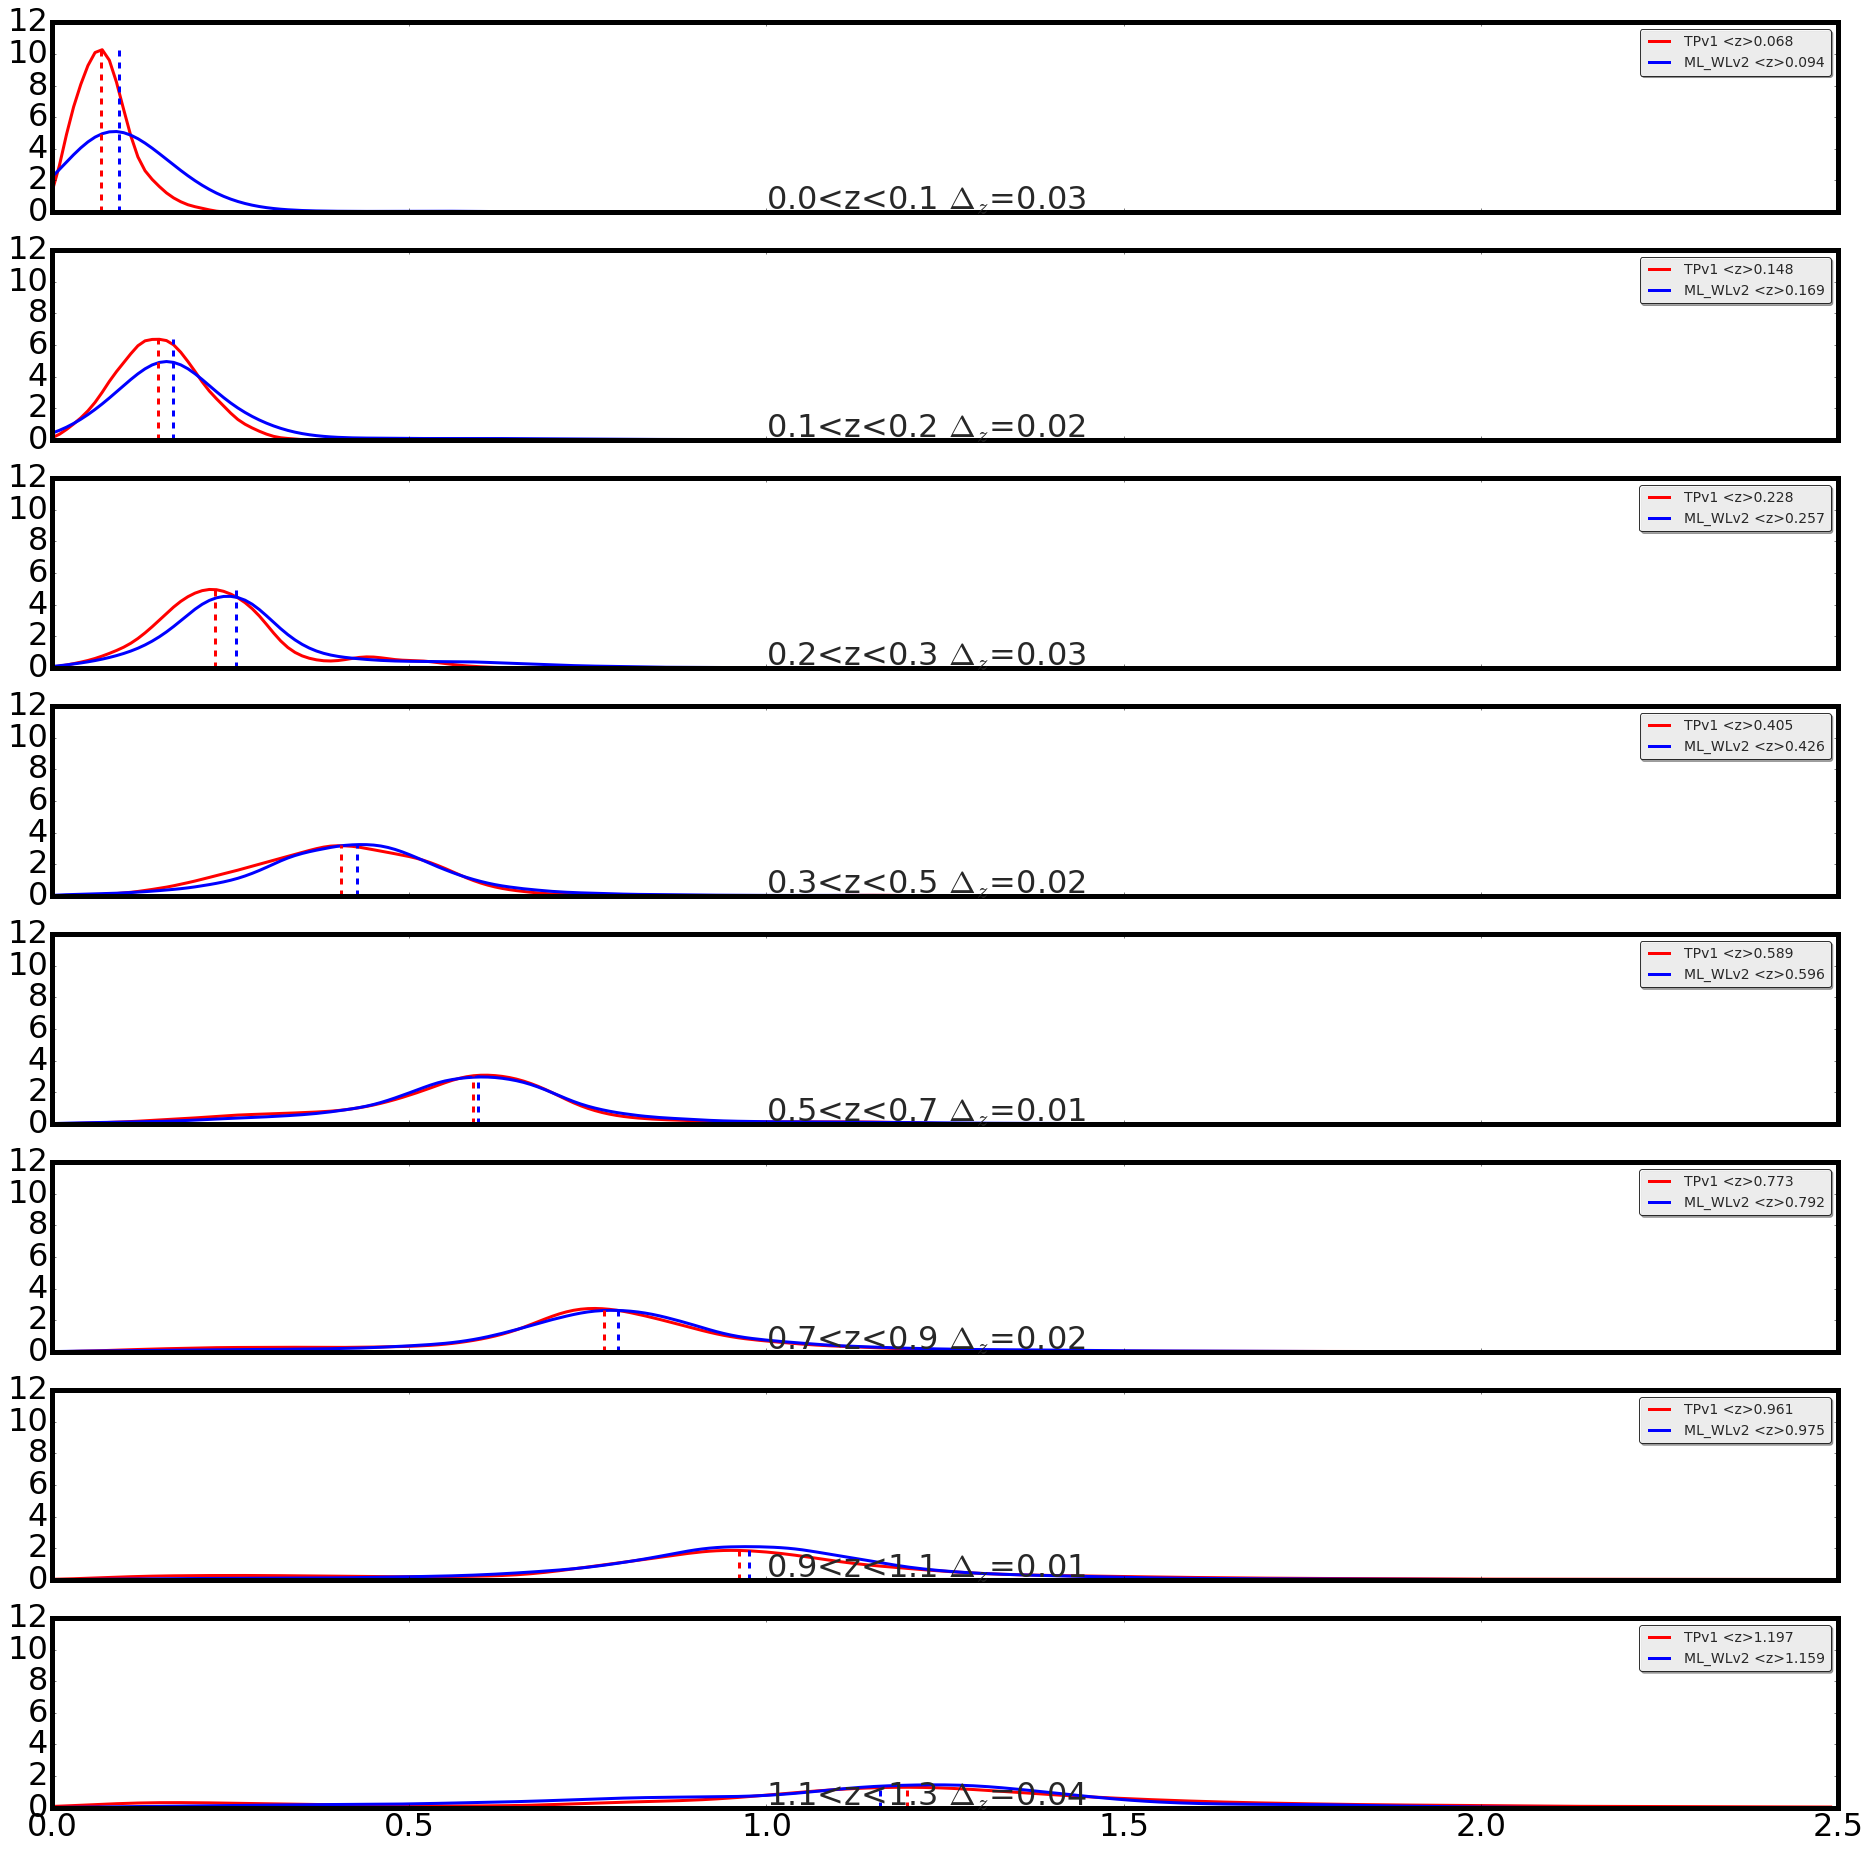

In [23]:
bns = [0.0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3]
zbins = np.arange(0, 2.5, 0.01)
f = plt.figure()
f, ax_ = plt.subplots(8, sharex=True, sharey=True)
for i in range(len(bns)-1):
    ind = (d['MEAN_Z_TP'] >= bns[i]) * (d['MEAN_Z_TP'] < bns[i+1])
    z_tp = gss_kde(d['Z_MC_TP'][ind]).evaluate(zbins)
    #z_tp = z_tp/np.amax(z_tp)
    mean_tp = np.median(d['Z_MC_TP'][ind])
    
    ind_ml = (d['MEAN_Z_ML'] >= bns[i]) * (d['MEAN_Z_ML'] < bns[i+1])
    z_ml = gss_kde(d['Z_MC_ML'][ind_ml]).evaluate(zbins)
    #z_ml = z_ml/np.amax(z_ml)
    mean_ml = np.median(d['Z_MC_ML'][ind_ml])
    
    ax_[i].plot(zbins, z_tp, label='TPv1 <z>{:0.3f}'.format(mean_tp), color='red', linewidth=3)
    ax_[i].plot(zbins, z_ml, label='ML_WLv2 <z>{:0.3f}'.format(mean_ml), color='blue', linewidth=3)
    mx = np.amax([z_tp, z_ml])
    ax_[i].text(1.0, 0.2, 
        '{:0.1f}<z<{:0.1f}'.format(bns[i], bns[i+1]) + ' $\Delta_z$={:0.2f}'.format(np.abs(mean_tp-mean_ml)))
    ax_[i].legend()
    ax_[i].plot([mean_tp, mean_tp], [0,mx], '--', color='red', linewidth=3)
    ax_[i].plot([mean_ml, mean_ml], [0,mx], '--', color='blue', linewidth=3)
